In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gpt4_results = pd.read_excel('/content/gpt-40evalution_results.xlsx')
llama_results = pd.read_excel('/content/llama_70bevalution_results.xlsx')
led_results = pd.read_excel('/content/legal-led-16384evalution_results.xlsx')

In [3]:
print(len(gpt4_results))
print(len(llama_results))
print(len(led_results))

111
111
111


In [4]:
gpt4_results.head()

,case_id,gt_sum,md_sum,model,is_test,accuracies,mean_acc,std
0,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469
1,10363,"<p>On September 16, 2004, the U.S. Department ...","On September 16, 2004, the United States of Am...",gpt-40,False,"['100', '100', '100', '100', '94.4', '100', '1...",99.200000,2.116601
2,6149,"<p>In August 2005, the Dallas office of the EE...",This case involves a legal dispute where the E...,gpt-40,False,"['93.33', '100', '100', '93.33', '100', '100',...",98.094286,3.254627
3,17512,<p>COVID-19 Summary: Immigration detainees hel...,"On March 25, 2020, twenty-four civil immigrati...",gpt-40,False,"['100', '100', '100', '100', '100', '100', '100']",100.000000,0.000000
4,6247,<p>The EEOC's Birmingham district office sued ...,"In a case filed on May 17, 2001, the Equal Emp...",gpt-40,False,"['94.12', '94.1', '86.7', '100', '94.12', '100...",94.734286,4.501196


In [5]:
results_df = pd.concat([gpt4_results, llama_results, led_results])
len(results_df)

333

In [6]:
processed_df = pd.read_excel('/content/datasetwlink-clearninghouse-sample-final.xlsx')
print(len(processed_df))
processed_df.head()

1345


,case id,doc_id,case_summary,text,file,document length,complaint count,appeal count,docket count,case types,doc_count,doc_len_sum,difficulty,case_difficulty,doc_len_category,doc_count_category,docket_count_category,appeal_count_category,complaint_count_category
0,12997,58319,"<p>On May 17, 2006, American citizens who use ...",CaseC:C 1aa0ss-ee1335::060817-6-cc v v - -0 01...,doc/58319.pdf,32765,1,70,358,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
1,12997,53246,"<p>On May 17, 2006, American citizens who use ...",CaCsaes: e039:-0176-6c7v-60 0 0639/31-8J/S2W0...,doc/53246.pdf,15325,1,70,358,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
2,12997,53232,"<p>On May 17, 2006, American citizens who use ...",Case3:07-cv-00693-VRW Document46 Filed01/...,doc/53232.pdf,32765,1,70,358,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
3,12997,76745,"<p>On May 17, 2006, American citizens who use ...",STUART F. DELERY \nActing Assistant Attorney G...,doc/76745.pdf,32765,1,70,358,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
4,12997,74563,"<p>On May 17, 2006, American citizens who use ...",BETH S. BRINKMANN \nDeputy Assistant Attorney ...,doc/74563.pdf,32765,1,70,358,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small


In [7]:
processed_df.rename(columns={'case id':'case_id'}, inplace=True)
processed_df.columns

Index(['case_id', 'doc_id', 'case_summary', 'text', 'file', 'document length',
       'complaint count', 'appeal count', 'docket count', 'case types',
       'doc_count', 'doc_len_sum', 'difficulty', 'case_difficulty',
       'doc_len_category', 'doc_count_category', 'docket_count_category',
       'appeal_count_category', 'complaint_count_category'],
      dtype='object')

In [8]:
df = results_df.merge(processed_df, on='case_id', how='left')
print(len(df))
df.head()

4035


,case_id,gt_sum,md_sum,model,is_test,accuracies,mean_acc,std,doc_id,case_summary,...,case types,doc_count,doc_len_sum,difficulty,case_difficulty,doc_len_category,doc_count_category,docket_count_category,appeal_count_category,complaint_count_category
0,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469,58319,"<p>On May 17, 2006, American citizens who use ...",...,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
1,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469,53246,"<p>On May 17, 2006, American citizens who use ...",...,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
2,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469,53232,"<p>On May 17, 2006, American citizens who use ...",...,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
3,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469,76745,"<p>On May 17, 2006, American citizens who use ...",...,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small
4,12997,"<p>On May 17, 2006, American citizens who use ...",Putative class actions were filed by two separ...,gpt-40,False,"['56', '56', '61.11', '36.11', '50', '87.5', '...",56.274286,15.952469,74563,"<p>On May 17, 2006, American citizens who use ...",...,National Security,18,449524,0.13362,Easy,Long,Large,Large,Large,Small


In [9]:
df = df.groupby(['case_id', 'model']).first().reset_index()

In [10]:
gpt_df = df[df['model'] == 'gpt-40']
llama_df = df[df['model'] == 'llama_70b']
led_df = df[df['model'] == 'legal-led-16384']

## Analysis of Results

### DF Statistics

In [11]:
# gpt corr stats
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
gpt_df[numerical_columns].corr()

,case_id,mean_acc,std,doc_id,document length,complaint count,appeal count,docket count,doc_count,doc_len_sum,difficulty
case_id,1.000000,0.051128,-0.022430,0.650908,0.304940,0.262923,-0.020009,0.445129,-0.112042,-0.070593,-0.069709
mean_acc,0.051128,1.000000,-0.295862,0.089222,-0.063772,-0.013535,-0.289822,-0.267124,-0.419147,-0.408767,-0.408949
std,-0.022430,-0.295862,1.000000,0.137347,0.061871,-0.035369,0.244302,0.052164,0.137806,0.148258,0.148243
doc_id,0.650908,0.089222,0.137347,1.000000,0.274737,0.117549,0.118583,0.257578,0.125520,0.161442,0.161797
document length,0.304940,-0.063772,0.061871,0.274737,1.000000,0.218590,0.185747,0.058397,0.033705,0.063252,0.063315
complaint count,0.262923,-0.013535,-0.035369,0.117549,0.218590,1.000000,0.041090,0.174871,0.214968,0.231707,0.231852
appeal count,-0.020009,-0.289822,0.244302,0.118583,0.185747,0.041090,1.000000,0.150983,0.426663,0.416897,0.416870
docket count,0.445129,-0.267124,0.052164,0.257578,0.058397,0.174871,0.150983,1.000000,0.411061,0.417194,0.418730
doc_count,-0.112042,-0.419147,0.137806,0.125520,0.033705,0.214968,0.426663,0.411061,1.000000,0.982673,0.982674
doc_len_sum,-0.070593,-0.408767,0.148258,0.161442,0.063252,0.231707,0.416897,0.417194,0.982673,1.000000,0.999999


In [12]:
led_df[numerical_columns].corr()

,case_id,mean_acc,std,doc_id,document length,complaint count,appeal count,docket count,doc_count,doc_len_sum,difficulty
case_id,1.000000,-0.108068,-0.036434,0.650908,0.304940,0.262923,-0.020009,0.445129,-0.112042,-0.070593,-0.069709
mean_acc,-0.108068,1.000000,-0.077713,-0.264773,-0.187745,-0.173127,-0.213260,-0.116196,-0.297272,-0.329510,-0.329471
std,-0.036434,-0.077713,1.000000,0.019754,0.114055,0.017225,0.042936,-0.084891,-0.036240,-0.053185,-0.053300
doc_id,0.650908,-0.264773,0.019754,1.000000,0.274737,0.117549,0.118583,0.257578,0.125520,0.161442,0.161797
document length,0.304940,-0.187745,0.114055,0.274737,1.000000,0.218590,0.185747,0.058397,0.033705,0.063252,0.063315
complaint count,0.262923,-0.173127,0.017225,0.117549,0.218590,1.000000,0.041090,0.174871,0.214968,0.231707,0.231852
appeal count,-0.020009,-0.213260,0.042936,0.118583,0.185747,0.041090,1.000000,0.150983,0.426663,0.416897,0.416870
docket count,0.445129,-0.116196,-0.084891,0.257578,0.058397,0.174871,0.150983,1.000000,0.411061,0.417194,0.418730
doc_count,-0.112042,-0.297272,-0.036240,0.125520,0.033705,0.214968,0.426663,0.411061,1.000000,0.982673,0.982674
doc_len_sum,-0.070593,-0.329510,-0.053185,0.161442,0.063252,0.231707,0.416897,0.417194,0.982673,1.000000,0.999999


In [13]:
llama_df[numerical_columns].corr()

,case_id,mean_acc,std,doc_id,document length,complaint count,appeal count,docket count,doc_count,doc_len_sum,difficulty
case_id,1.000000,-0.104504,0.116158,0.650908,0.304940,0.262923,-0.020009,0.445129,-0.112042,-0.070593,-0.069709
mean_acc,-0.104504,1.000000,-0.620737,-0.019370,-0.148850,-0.080723,-0.101186,-0.077996,0.101599,0.076686,0.076478
std,0.116158,-0.620737,1.000000,0.165088,0.199032,0.176072,0.103669,-0.102546,-0.091449,-0.069025,-0.069160
doc_id,0.650908,-0.019370,0.165088,1.000000,0.274737,0.117549,0.118583,0.257578,0.125520,0.161442,0.161797
document length,0.304940,-0.148850,0.199032,0.274737,1.000000,0.218590,0.185747,0.058397,0.033705,0.063252,0.063315
complaint count,0.262923,-0.080723,0.176072,0.117549,0.218590,1.000000,0.041090,0.174871,0.214968,0.231707,0.231852
appeal count,-0.020009,-0.101186,0.103669,0.118583,0.185747,0.041090,1.000000,0.150983,0.426663,0.416897,0.416870
docket count,0.445129,-0.077996,-0.102546,0.257578,0.058397,0.174871,0.150983,1.000000,0.411061,0.417194,0.418730
doc_count,-0.112042,0.101599,-0.091449,0.125520,0.033705,0.214968,0.426663,0.411061,1.000000,0.982673,0.982674
doc_len_sum,-0.070593,0.076686,-0.069025,0.161442,0.063252,0.231707,0.416897,0.417194,0.982673,1.000000,0.999999


### Model Accuracies

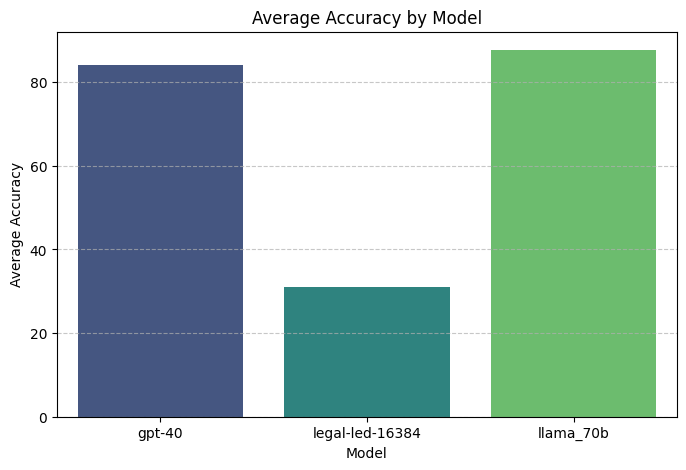

In [14]:
model_accuracy = df.groupby('model')['mean_acc'].mean().reset_index()

# Plotting the accuracies for each model using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='model', y='mean_acc', data=model_accuracy, palette='viridis')
plt.title("Average Accuracy by Model")
plt.xlabel("Model")
plt.ylabel("Average Accuracy")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

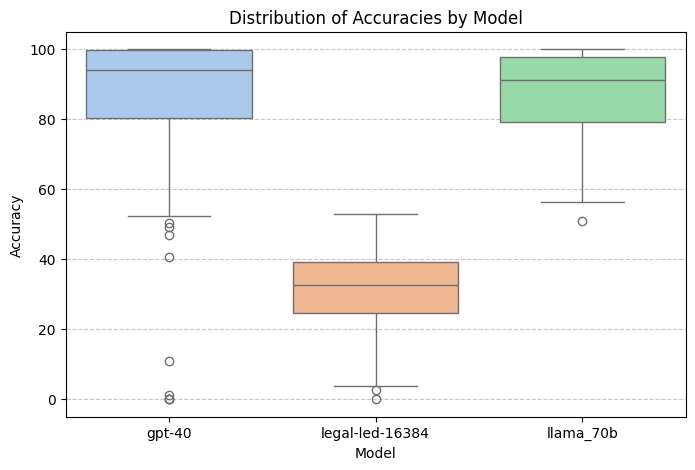

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='model', y='mean_acc', data=df, palette='pastel')
plt.title("Distribution of Accuracies by Model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
llama_average_accuracy = df[df['model'] == 'llama_70b']['mean_acc'].mean()
gpt4_average_accuracy = df[df['model'] == 'gpt-40']['mean_acc'].mean()
led_average_accuracy = df[df['model'] == 'legal-led-16384']['mean_acc'].mean()

print("Llama Average Accuracy:", llama_average_accuracy)
print("GPT-4 Average Accuracy:", gpt4_average_accuracy)
print("LED Average Accuracy:", led_average_accuracy)


Llama Average Accuracy: 87.6571685971686
GPT-4 Average Accuracy: 84.08675675675673
LED Average Accuracy: 30.933722222222222


### Effect of Docket Count On Accuracy

In [17]:
gpt_df['docket_count_category'].value_counts()

,count
docket_count_category,
Small,88
Large,23


<Figure size 1000x600 with 0 Axes>

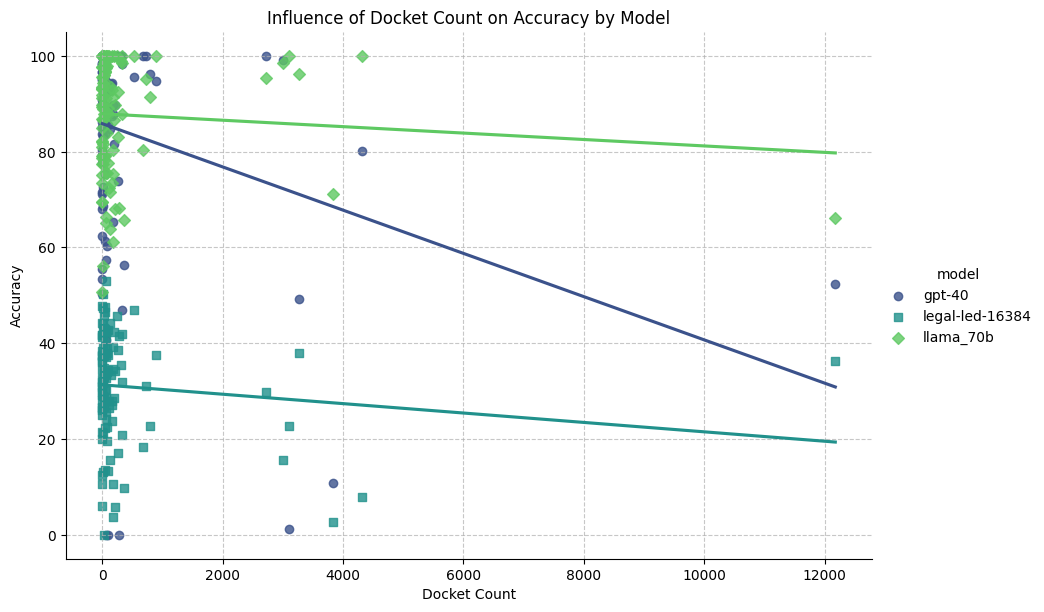

In [18]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='docket count',
    y='mean_acc',
    hue='model',
    data=df,
    palette='viridis',
    height=6,
    aspect=1.5,
    markers=["o", "s", "D"],
    ci=None
)
plt.title("Influence of Docket Count on Accuracy by Model")
plt.xlabel("Docket Count")
plt.ylabel("Accuracy")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

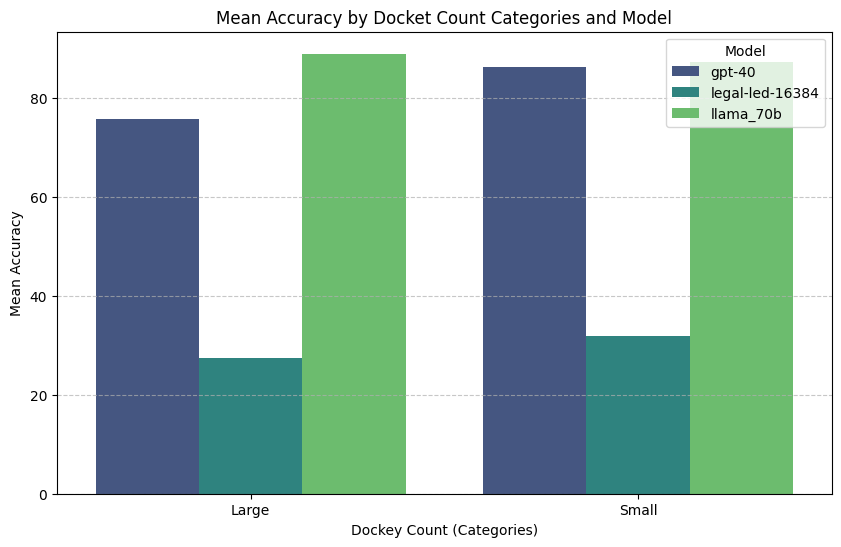

In [19]:
grouped_data = df.groupby(['docket_count_category', 'model'])['mean_acc'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='docket_count_category', y='mean_acc', hue='model', data=grouped_data, palette='viridis')
plt.title("Mean Accuracy by Docket Count Categories and Model")
plt.xlabel("Dockey Count (Categories)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

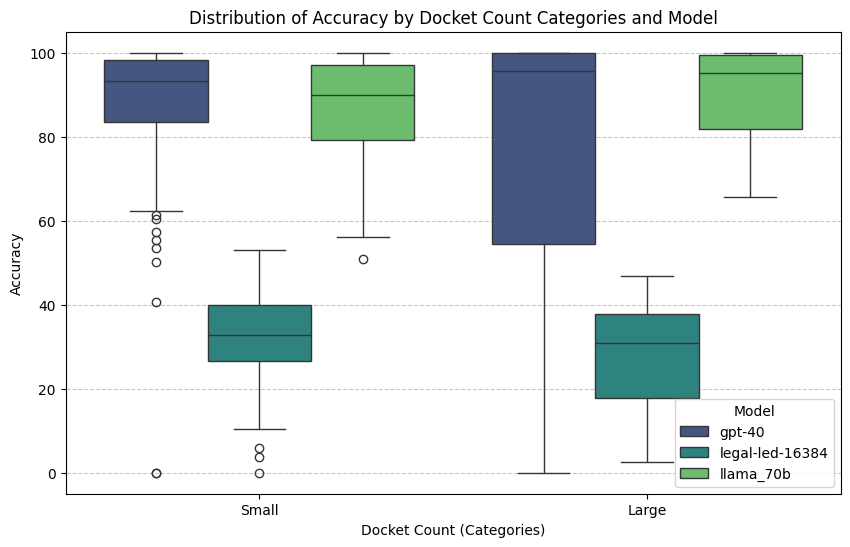

In [20]:
# Grouping data by docket count category and model is not necessary for a box plot
# Directly using the original DataFrame for the plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='docket_count_category',
    y='mean_acc',
    hue='model',
    data=df,
    palette='viridis'
)
plt.title("Distribution of Accuracy by Docket Count Categories and Model")
plt.xlabel("Docket Count (Categories)")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Effect Appeal Count On Accuracy

In [21]:
gpt_df['appeal_count_category'].value_counts()

,count
appeal_count_category,
Small,89
Large,22


<Figure size 1000x600 with 0 Axes>

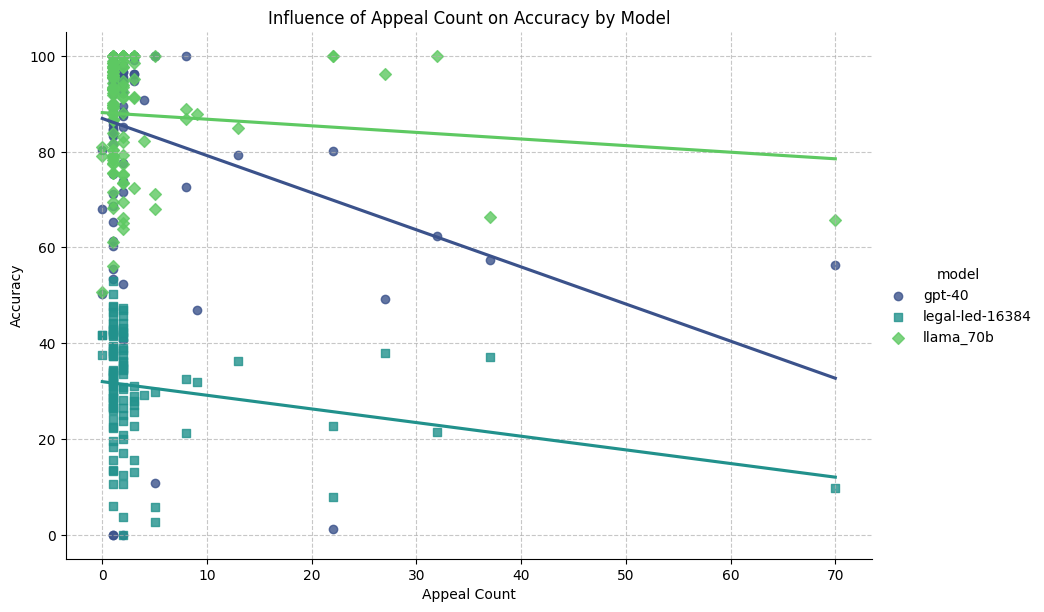

In [22]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='appeal count',
    y='mean_acc',
    hue='model',
    data=df,
    palette='viridis',
    height=6,
    aspect=1.5,
    markers=["o", "s", "D"],
    ci=None
)
plt.title("Influence of Appeal Count on Accuracy by Model")
plt.xlabel("Appeal Count")
plt.ylabel("Accuracy")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

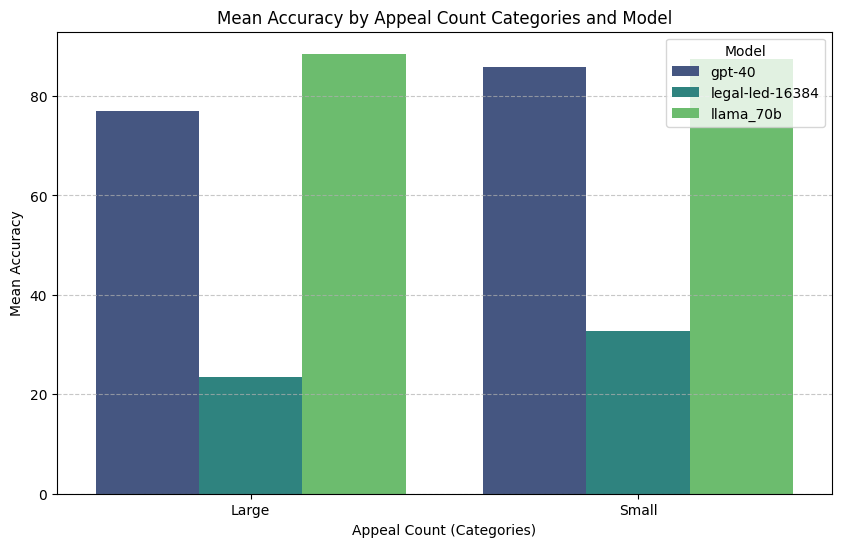

In [23]:
grouped_data = df.groupby(['appeal_count_category', 'model'])['mean_acc'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='appeal_count_category', y='mean_acc', hue='model', data=grouped_data, palette='viridis')
plt.title("Mean Accuracy by Appeal Count Categories and Model")
plt.xlabel("Appeal Count (Categories)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Effect of Complaint Count On Accuracy

In [24]:
gpt_df['complaint_count_category'].value_counts()

,count
complaint_count_category,
Small,105
Large,6


In [25]:
gpt_df['complaint count'].value_counts()


,count
complaint count,
1,43
0,36
2,26
3,4
7,1
4,1


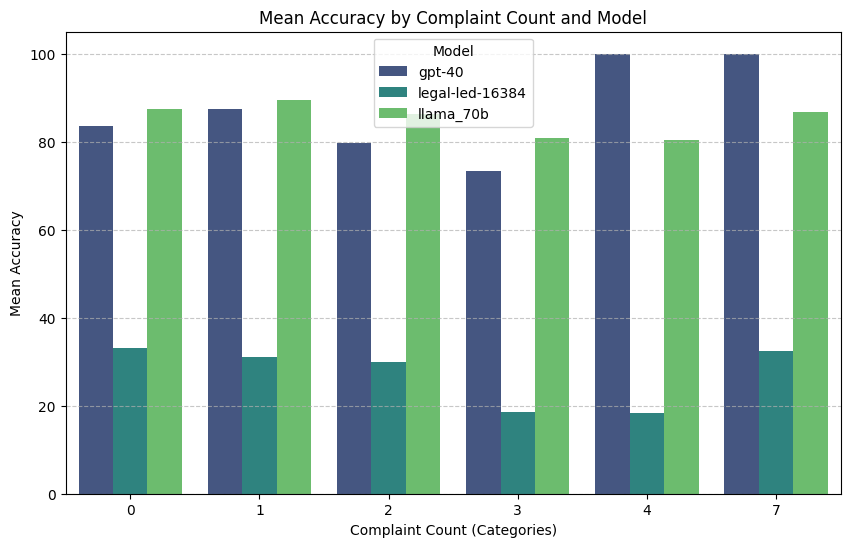

In [26]:
grouped_data = df.groupby(['complaint count', 'model'])['mean_acc'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='complaint count', y='mean_acc', hue='model', data=grouped_data, palette='viridis')
plt.title("Mean Accuracy by Complaint Count and Model")
plt.xlabel("Complaint Count (Categories)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

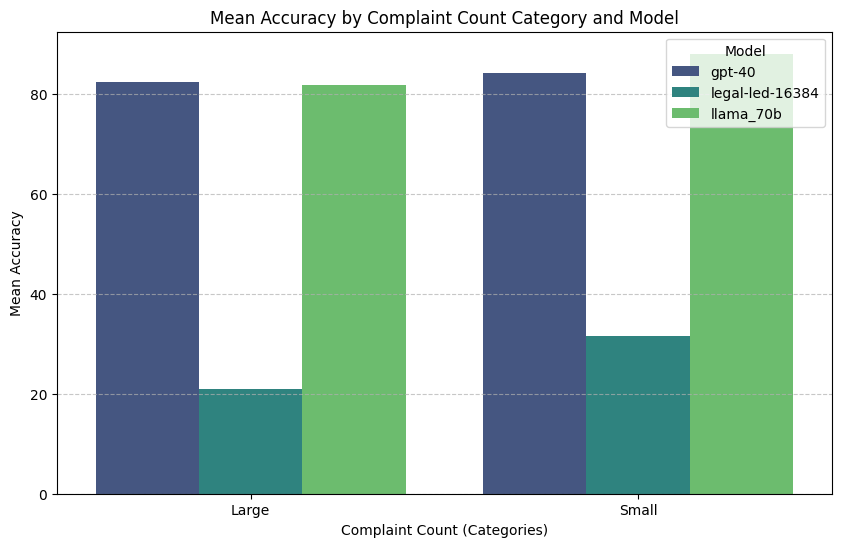

In [27]:
grouped_data = df.groupby(['complaint_count_category', 'model'])['mean_acc'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='complaint_count_category', y='mean_acc', hue='model', data=grouped_data, palette='viridis')
plt.title("Mean Accuracy by Complaint Count Category and Model")
plt.xlabel("Complaint Count (Categories)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Effect Document Length On Accuracy

In [28]:
gpt_df['doc_len_category'].value_counts()

,count
doc_len_category,
Medium,51
Long,42
Short,18


<Figure size 1000x600 with 0 Axes>

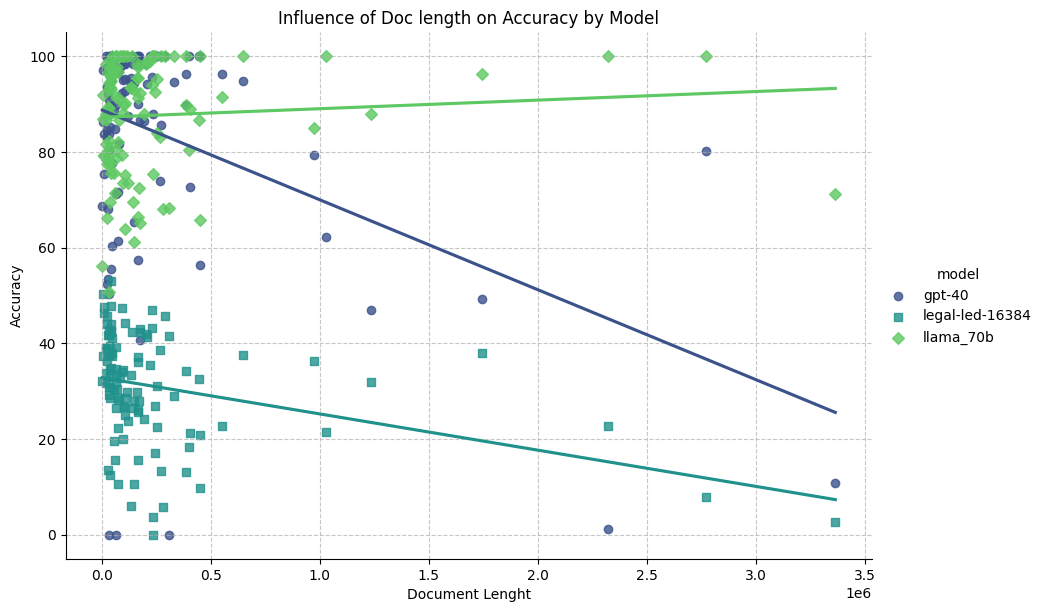

In [29]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='doc_len_sum',
    y='mean_acc',
    hue='model',
    data=df,
    palette='viridis',
    height=6,
    aspect=1.5,
    markers=["o", "s", "D"],
    ci=None
)
plt.title("Influence of Doc length on Accuracy by Model")
plt.xlabel("Document Lenght")
plt.ylabel("Accuracy")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

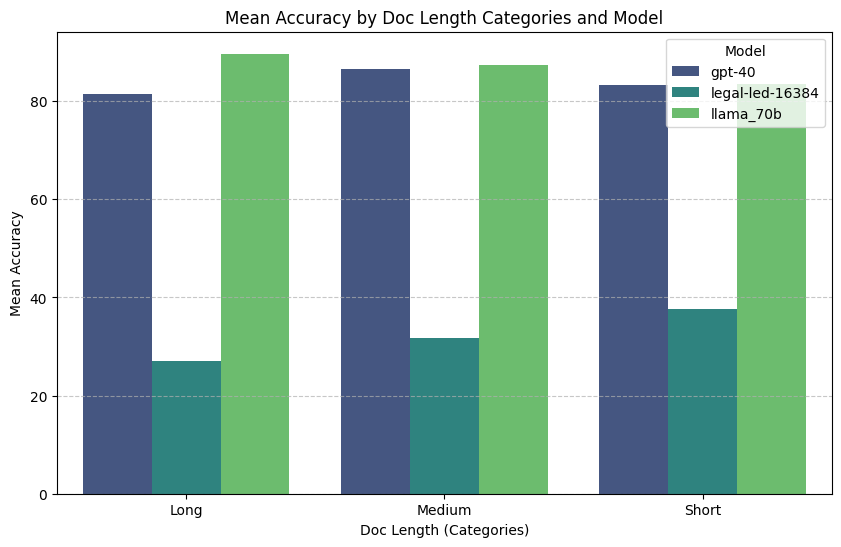

In [30]:
grouped_data = df.groupby(['doc_len_category', 'model'])['mean_acc'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='doc_len_category', y='mean_acc', hue='model', data=grouped_data, palette='viridis')
plt.title("Mean Accuracy by Doc Length Categories and Model")
plt.xlabel("Doc Length (Categories)")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Our defined Difficulty Influence On Accuracy

<Figure size 1000x600 with 0 Axes>

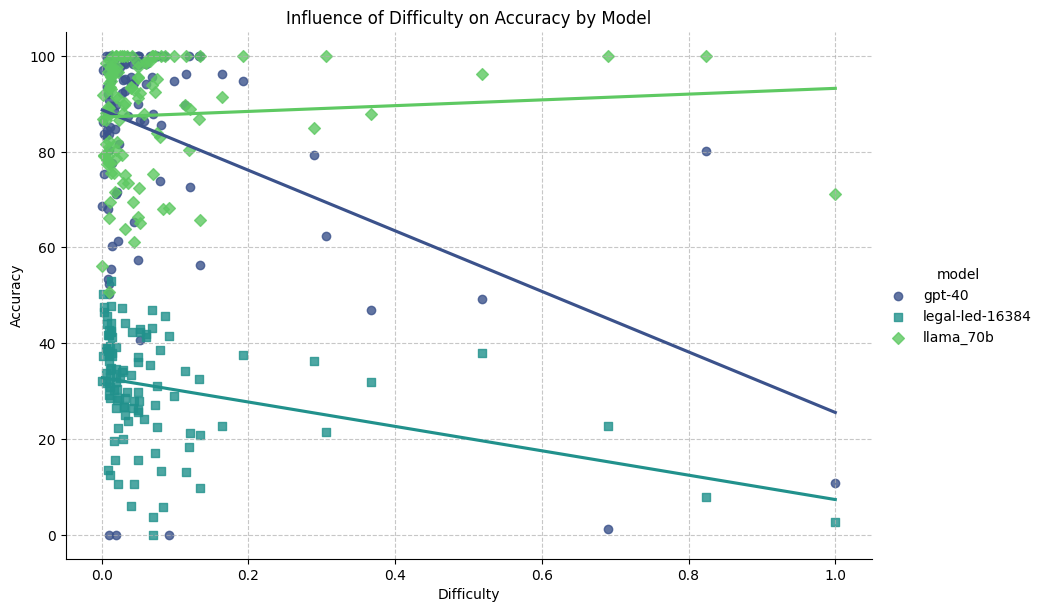

In [31]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='difficulty',
    y='mean_acc',
    hue='model',
    data=df,
    palette='viridis',
    height=6,
    aspect=1.5,
    markers=["o", "s", "D"],
    ci=None
)
plt.title("Influence of Difficulty on Accuracy by Model")
plt.xlabel("Difficulty")
plt.ylabel("Accuracy")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## Summary of Results:

1. Llama_70B model performs better at summarizaton followed by GPT
  * Llama Average Accuracy: 87.6571685971686
  * GPT-4 Average Accuracy: 84.08675675675673
  * LED Average Accuracy: 30.933722222222222
2.  Accuracy generally tend to decrease as docket count increases however this effect isn't so pronouned in the llama model

3. Accuracy generally tend to decrease as appeal count increases in gpt and legal led. It generally has no effect on Llama

4. For all models - Accuracy reduces as complaint count increases

5. There is a moderate negative correlation between accuracy and document length for legal led and gpt. Document length has no effect on llama model

6. There is a moderate negative correlation between accuracy and our defined difficulty for legal led and gpt. llama model accuarcy has zero correlation with difficulty